## Jupyter Data Science Workflow
### From exploratory analysis to reproducible science

Learning by Foo Choo Yen

In [1]:
import os
from urllib.request import urlretrieve
import pandas as pd
from sodapy import Socrata

URL = 'https://data.seattle.gov/resource/65db-xm6k.json'

def get_fremont_data(file_name='Fremont.csv',url=URL, force_download=False):
    if force_download or not os.path.exists(file_name):
        # Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
        client = Socrata("data.seattle.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.seattle.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
        results = client.get("65db-xm6k", limit=3000)

# Convert to pandas DataFrame
        results_df = pd.DataFrame.from_records(results)
        results_df.to_csv('Fremont.csv')
    data = pd.read_csv('Fremont.csv',index_col='date', parse_dates=True)
    data.drop('Unnamed: 0', inplace=True, axis=1)
    return data
        

In [2]:
data =get_fremont_data()
data.head()

,fremont_bridge,fremont_bridge_nb,fremont_bridge_sb
date,,,
2023-12-31 23:00:00,45,15,30
2023-12-31 22:00:00,22,12,10
2023-12-31 21:00:00,20,9,11
2023-12-31 20:00:00,27,14,13
2023-12-31 19:00:00,33,14,19


<Axes: xlabel='date'>

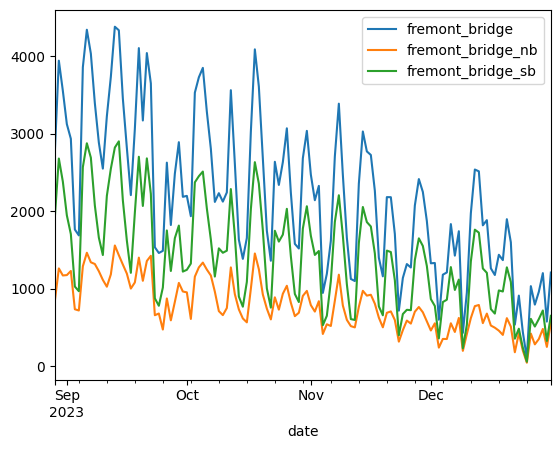

In [3]:
data.resample('D').sum().plot()

C:\Users\chooyen\AppData\Local\Temp\ipykernel_22604\1656961385.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='date'>

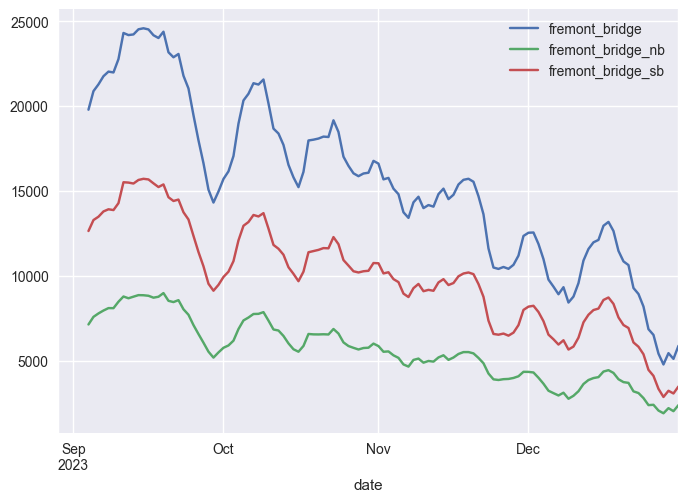

In [4]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
data.resample('D').sum().rolling(7).sum().plot()

<Axes: xlabel='time'>

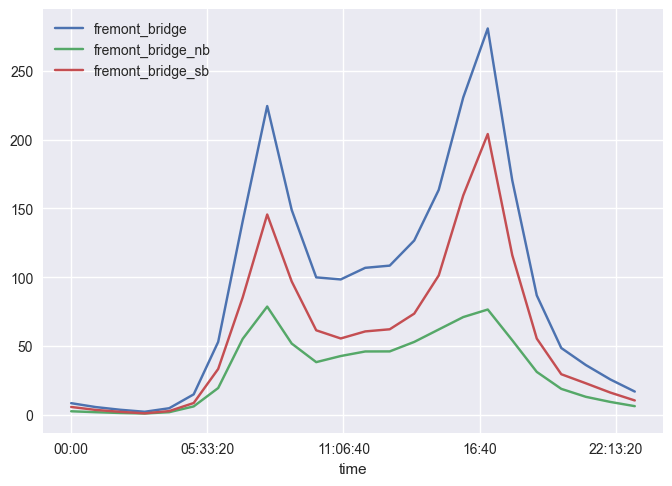

In [5]:
data.groupby(data.index.time).mean().plot()

In [6]:
pivoted = data.pivot_table('fremont_bridge',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2023-08-29,2023-08-30,2023-08-31,2023-09-01,2023-09-02
00:00:00,7,6,13,14,19
01:00:00,3,6,6,12,11
02:00:00,2,5,3,8,8
03:00:00,4,4,6,3,7
04:00:00,11,11,10,8,5


<Axes: xlabel='time'>

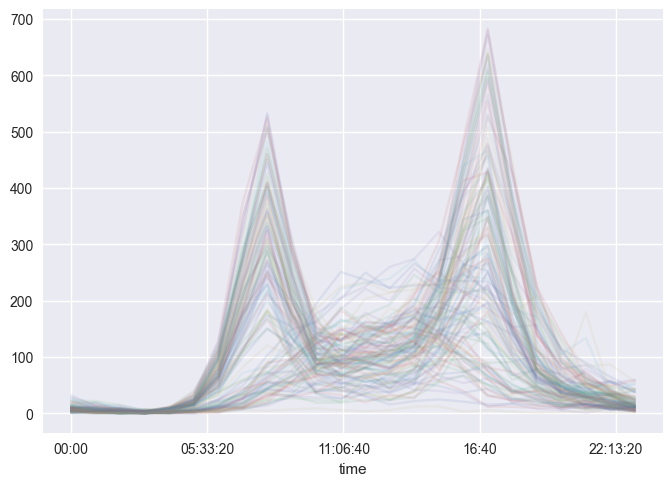

In [7]:
pivoted.plot(legend=False,alpha =0.1)